In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
import nltk
import re
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
#open file
with open("Key_Events_20th_Century.txt", "r", errors='ignore') as file:
    article_text = file.read().replace('\n', ' ')

In [6]:
#Tokenize article text
from nltk.tokenize import word_tokenize
tokens = word_tokenize(article_text)
print(tokens) 

ModuleNotFoundError: No module named 'regex._regex'

<Axes: title={'center': 'Top 10 Most Frequent Words (Before Cleaning)'}, xlabel='Samples', ylabel='Counts'>

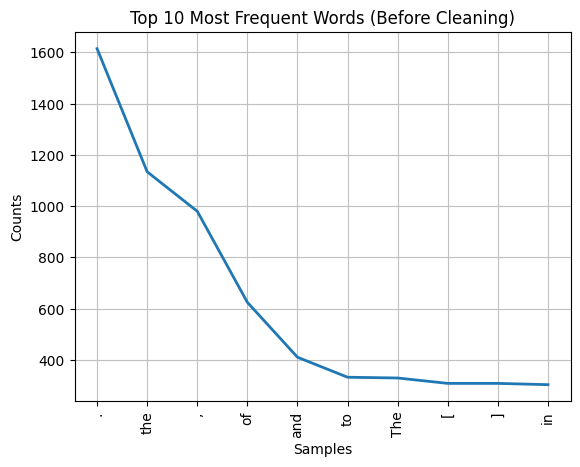

In [16]:
# Plot the top 10 most frequent words
fd = FreqDist(tokens)
fd.plot(10, title="Top 10 Most Frequent Words (Before Cleaning)")

In [17]:
# Get stopwords
stop_words = set(stopwords.words("english"))

In [18]:
# Filter out stopwords and non-alphabetic words
clean_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

<Axes: title={'center': 'Top 10 Words After Cleaning'}, xlabel='Samples', ylabel='Counts'>

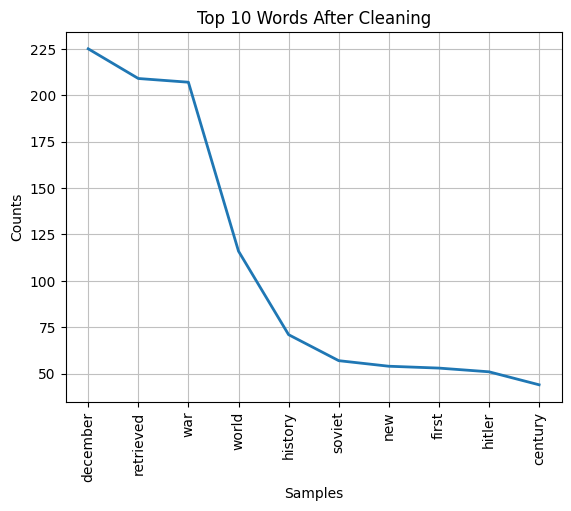

In [19]:
# Plot cleaned frequency distribution
fd_clean = FreqDist(clean_tokens)
fd_clean.plot(10, title="Top 10 Words After Cleaning")

In [23]:
fd_clean.most_common(20)

[('december', 225),
 ('retrieved', 209),
 ('war', 207),
 ('world', 116),
 ('history', 71),
 ('soviet', 57),
 ('new', 54),
 ('first', 53),
 ('hitler', 51),
 ('century', 44),
 ('germany', 41),
 ('isbnâ', 40),
 ('battle', 39),
 ('nuclear', 38),
 ('would', 38),
 ('edit', 35),
 ('states', 33),
 ('japan', 33),
 ('end', 32),
 ('ii', 32)]

In [26]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\anika\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [27]:
# Create TextBlob object
blob = TextBlob(' '.join(clean_tokens))

In [28]:
# Get list
tags = blob.tags

In [29]:
# Create DataFrame from tags
df_tags = pd.DataFrame(tags, columns=["Word", "Tag"])

In [30]:
# Get top 10 POS tags
top_tags = df_tags['Tag'].value_counts().nlargest(10).reset_index()
top_tags.columns = ['Tag', 'Count']

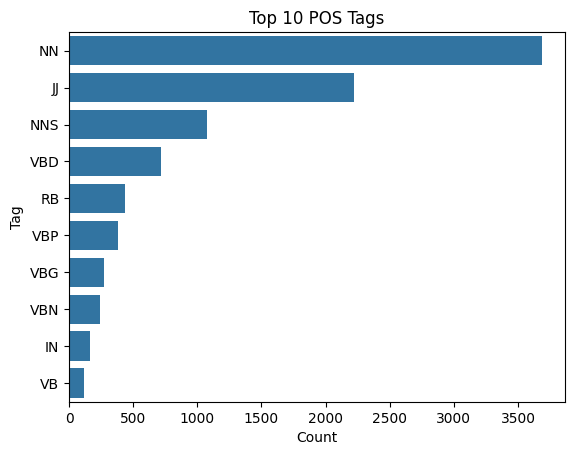

In [32]:
# Bar Plot
sns.barplot(data=top_tags, x='Count', y='Tag')
plt.title("Top 10 POS Tags")
plt.show()

In [33]:
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
df_nouns = df_tags[df_tags['Tag'].isin(noun_tags)]

In [34]:
top_nouns = df_nouns['Word'].value_counts().nlargest(15).reset_index()
top_nouns.columns = ['Word', 'Count']

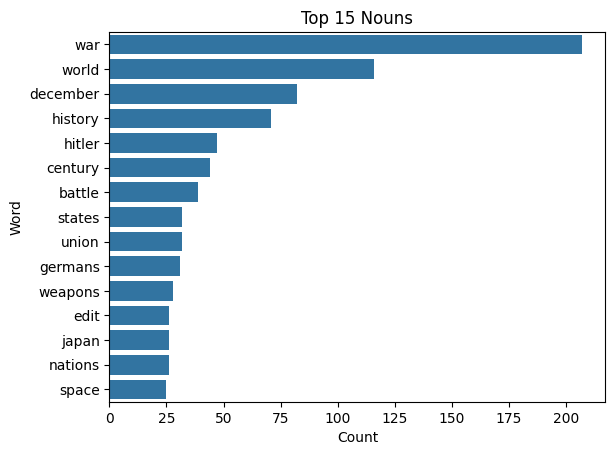

In [35]:
sns.barplot(data=top_nouns, x='Count', y='Word')
plt.title("Top 15 Nouns")
plt.show()

In [37]:
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
df_verbs = df_tags[df_tags['Tag'].isin(verb_tags)]

In [38]:
top_verbs = df_verbs['Word'].value_counts().nlargest(15).reset_index()
top_verbs.columns = ['Word', 'Count']

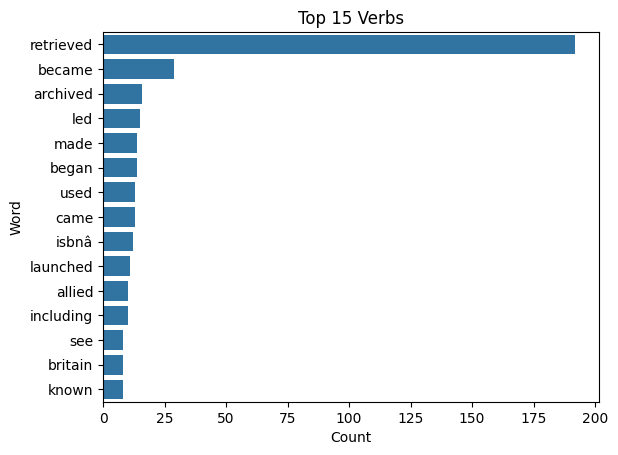

In [39]:
sns.barplot(data=top_verbs, x='Count', y='Word')
plt.title("Top 15 Verbs")
plt.show()

In [44]:
adj_tags = ['JJ', 'JJR', 'JJS']
df_adjs = df_tags[df_tags['Tag'].isin(adj_tags)]

In [45]:
top_adjs = df_adjs['Word'].value_counts().nlargest(15).reset_index()
top_adjs.columns = ['Word', 'Count']

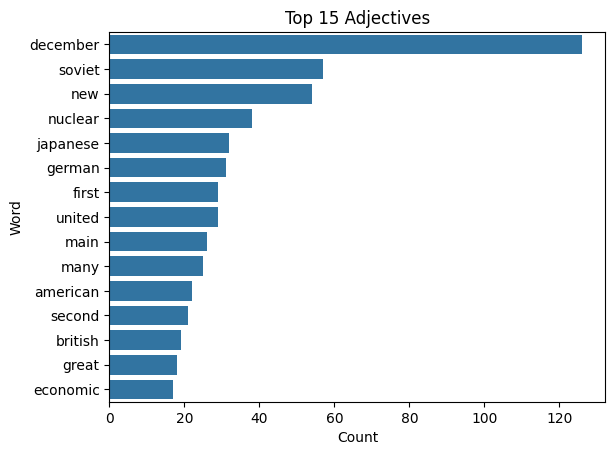

In [46]:
sns.barplot(data=top_adjs, x='Count', y='Word')
plt.title("Top 15 Adjectives")
plt.show()

In [47]:
##The frequency of nouns highlights key actors and events (e.g., “war”, “Hitler”). Verbs reveal significant actions, while adjectives help describe historical impacts.

In [51]:
#Scrape country list from Wikipedia
import requests
from bs4 import BeautifulSoup

In [52]:
url = "https://en.wikipedia.org/wiki/List_of_sovereign_states"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [53]:
#Find the right table
table = soup.find("table", {"class": "wikitable"})

In [58]:
country_list = []
for row in table.find_all('tr')[1:]:  # Skip header row
    cells = row.find_all('td')
    if cells:
        # Extract country name from the first column (usually a link)
        country_name = cells[0].find('a')
        if country_name:  # Ensure the link exists
            country_list.append(country_name.text.strip().lower())

In [61]:
from collections import Counter

word_freq = Counter(clean_tokens)

In [62]:
# Count times each country is mentioned
country_freq = {country: word_freq[country] for country in country_list if country in word_freq}

In [63]:
# Convert to DataFrame
df_countries = pd.DataFrame(country_freq.items(), columns=['Country', 'Count'])
df_countries = df_countries.sort_values(by='Count', ascending=False)

print(df_countries)

        Country  Count
18      germany     41
28        japan     33
17       france     17
27        italy     14
45       poland     13
55      vietnam     13
47       russia      9
11        china      9
23        india      9
33        libya      5
41       norway      5
44  philippines      5
26       israel      4
24         iran      4
16      finland      4
20       greece      4
34    lithuania      3
21       guinea      3
42     pakistan      3
4       austria      3
46      romania      3
13      denmark      3
12         cuba      3
7       belgium      2
40  netherlands      2
50    singapore      2
54      ukraine      2
31       latvia      2
0       albania      2
5    bangladesh      2
3     australia      2
9      cambodia      2
10       canada      2
14        egypt      2
15      estonia      2
43       panama      1
8      bulgaria      1
53     thailand      1
52       sweden      1
51        spain      1
49   seychelles      1
48       rwanda      1
2        an

In [2]:
sns.barplot(data=df_countries, x='Count', y='Country')
plt.title("Country Mentions in 20th-Century Article")
plt.xlabel("Mentions")
plt.ylabel("Country")
plt.show()

NameError: name 'sns' is not defined

In [65]:
#Countries with high mention counts (e.g., Germany, Japan, France) were central to major 20th-century conflicts and movements

In [1]:
#save country list
df_countries.to_csv("df_countries.csv", index=False)

NameError: name 'df_countries' is not defined